In [5]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [7]:
!pip install datetime

     ---------------------------------------- 0.0/45.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/45.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/45.6 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/45.6 kB ? eta -:--:--
     ---------------------------------------- 45.6/45.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   -------------------------------------- - 51.2/52.6 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 52.6/52.6 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 kB ? eta -:--:--
   ----------- ---------------------------- 61.4/212


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta 
 
np.random.seed(42) 
 
# Generate product data
def generate_product_data(n_products=100): 
    categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Beauty'] 
 
    products = pd.DataFrame({ 
        'product_id': range(1, n_products + 1), 
        'category': np.random.choice(categories, size=n_products), 
        'price': np.random.uniform(10, 1000, size=n_products).round(2), 
        'stock_level': np.random.randint(0, 200, size=n_products) 
    }) 
 
    return products 
 
# Generate sales data for 6 months
def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'): 
    dates = pd.date_range(start=start_date, end=end_date) 
    sales_list = [] 
 
    for date in dates: 
        # Generate more sales for weekends 
        n_sales = np.random.randint( 
            50, 100 if date.weekday() >= 5 else 80 
        ) 
 
        daily_sales = pd.DataFrame({ 
            'date': [date] * n_sales, 
            'product_id': np.random.choice(products['product_id'], size=n_sales), 
            'quantity': np.random.randint(1, 5, size=n_sales), 
            'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3]) 
        }) 
        sales_list.append(daily_sales) 
 
    sales_df = pd.concat(sales_list, ignore_index=True) 
 
    # Add returned items 
    sales_df['returned'] = np.random.choice( 
        [0, 1],  
        size=len(sales_df),  
        p=[0.95, 0.05]  # 5% return rate 
    ) 
 
    return sales_df 
 
# Generate the datasets 
products_df = generate_product_data() 
sales_df = generate_sales_data(products_df)

In [3]:
products_df

,product_id,category,price,stock_level
0,1,Home,915.81,10
1,2,Beauty,851.54,184
2,3,Books,454.96,177
3,4,Beauty,104.46,150
4,5,Beauty,377.11,158
...,...,...,...,...
95,96,Books,105.21,157
96,97,Beauty,941.12,45
97,98,Clothing,403.60,116
98,99,Clothing,522.57,5


In [4]:
sales_df

,date,product_id,quantity,discount_applied,returned
0,2023-07-01,37,3,0,0
1,2023-07-01,24,3,0,0
2,2023-07-01,93,3,0,0
3,2023-07-01,46,4,0,0
4,2023-07-01,53,4,1,0
...,...,...,...,...,...
12261,2023-12-31,30,1,0,0
12262,2023-12-31,52,1,0,0
12263,2023-12-31,79,3,0,0
12264,2023-12-31,20,2,1,0


In [38]:
clubbed_df = pd.merge(products_df, sales_df, on='product_id', how='inner')

In [6]:
clubbed_df

,product_id,category,price,stock_level,date,quantity,discount_applied,returned
0,1,Home,915.81,10,2023-07-02,3,0,0
1,1,Home,915.81,10,2023-07-02,1,0,0
2,1,Home,915.81,10,2023-07-04,3,1,0
3,1,Home,915.81,10,2023-07-05,2,1,0
4,1,Home,915.81,10,2023-07-09,2,0,1
...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0
12262,100,Electronics,839.33,98,2023-12-21,4,0,0
12263,100,Electronics,839.33,98,2023-12-23,1,0,0
12264,100,Electronics,839.33,98,2023-12-24,1,0,0


In [39]:
clubbed_df['revenue']=(clubbed_df['price']*(clubbed_df['quantity']-clubbed_df['returned']))-clubbed_df['discount_applied']

In [40]:
clubbed_df['sales']=clubbed_df['price']*clubbed_df['quantity']

In [25]:
clubbed_df

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,2747.43
1,1,Home,915.81,10,2023-07-02,1,0,0,915.81,915.81
2,1,Home,915.81,10,2023-07-04,3,1,0,2746.43,2747.43
3,1,Home,915.81,10,2023-07-05,2,1,0,1830.62,1831.62
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81,1831.62
...,...,...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0,839.33,839.33
12262,100,Electronics,839.33,98,2023-12-21,4,0,0,3357.32,3357.32
12263,100,Electronics,839.33,98,2023-12-23,1,0,0,839.33,839.33
12264,100,Electronics,839.33,98,2023-12-24,1,0,0,839.33,839.33


In [13]:
clubbed_df.sort_values('revenue').head(10)


,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue
6307,52,Home,489.98,168,2023-07-29,1,1,1,-1.0
9831,81,Beauty,805.11,29,2023-07-27,1,1,1,-1.0
44,1,Home,915.81,10,2023-09-02,1,1,1,-1.0
11337,93,Books,714.04,48,2023-08-30,1,1,1,-1.0
5803,48,Beauty,359.04,193,2023-08-14,1,1,1,-1.0
129,1,Home,915.81,10,2023-12-22,1,1,1,-1.0
2394,19,Electronics,119.78,36,2023-12-27,1,1,1,-1.0
7472,61,Clothing,261.38,135,2023-09-20,1,1,1,-1.0
2727,22,Beauty,896.81,98,2023-12-08,1,1,1,-1.0
9187,75,Beauty,453.31,50,2023-11-07,1,1,1,-1.0


In [15]:
clubbed_df['revenue'].nlargest(n=10)

8028    3991.04
8043    3991.04
8057    3991.04
8062    3991.04
8071    3991.04
8077    3991.04
8081    3991.04
8084    3991.04
8090    3991.04
8095    3991.04
Name: revenue, dtype: float64

In [18]:
clubbed_df.nlargest(n=10, columns=['revenue'])

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue
8028,66,Home,997.76,32,2023-07-01,4,0,0,3991.04
8043,66,Home,997.76,32,2023-07-23,4,0,0,3991.04
8057,66,Home,997.76,32,2023-08-16,4,0,0,3991.04
8062,66,Home,997.76,32,2023-08-25,4,0,0,3991.04
8071,66,Home,997.76,32,2023-09-06,4,0,0,3991.04
8077,66,Home,997.76,32,2023-09-14,4,0,0,3991.04
8081,66,Home,997.76,32,2023-09-23,4,0,0,3991.04
8084,66,Home,997.76,32,2023-09-25,4,0,0,3991.04
8090,66,Home,997.76,32,2023-10-01,4,0,0,3991.04
8095,66,Home,997.76,32,2023-10-04,4,0,0,3991.04


In [19]:
clubbed_df.nlargest(n=10, columns=['quantity'])

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue
9,1,Home,915.81,10,2023-07-13,4,0,1,2747.43
17,1,Home,915.81,10,2023-07-30,4,0,0,3663.24
21,1,Home,915.81,10,2023-08-04,4,0,0,3663.24
37,1,Home,915.81,10,2023-08-26,4,0,0,3663.24
38,1,Home,915.81,10,2023-08-27,4,1,0,3662.24
46,1,Home,915.81,10,2023-09-03,4,0,0,3663.24
54,1,Home,915.81,10,2023-09-14,4,1,0,3662.24
58,1,Home,915.81,10,2023-09-20,4,0,0,3663.24
60,1,Home,915.81,10,2023-09-22,4,0,0,3663.24
64,1,Home,915.81,10,2023-09-27,4,1,0,3662.24


In [20]:
clubbed_df.nlargest(n=10, columns=['returned'])

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81
8,1,Home,915.81,10,2023-07-12,2,0,1,915.81
9,1,Home,915.81,10,2023-07-13,4,0,1,2747.43
13,1,Home,915.81,10,2023-07-19,3,1,1,1830.62
23,1,Home,915.81,10,2023-08-05,2,0,1,915.81
44,1,Home,915.81,10,2023-09-02,1,1,1,-1.00
83,1,Home,915.81,10,2023-10-24,1,0,1,0.00
87,1,Home,915.81,10,2023-11-01,2,0,1,915.81
117,1,Home,915.81,10,2023-12-05,3,1,1,1830.62
129,1,Home,915.81,10,2023-12-22,1,1,1,-1.00


In [21]:
clubbed_df.nlargest(n=10, columns=['revenue','quantity','returned'])

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue
8028,66,Home,997.76,32,2023-07-01,4,0,0,3991.04
8043,66,Home,997.76,32,2023-07-23,4,0,0,3991.04
8057,66,Home,997.76,32,2023-08-16,4,0,0,3991.04
8062,66,Home,997.76,32,2023-08-25,4,0,0,3991.04
8071,66,Home,997.76,32,2023-09-06,4,0,0,3991.04
8077,66,Home,997.76,32,2023-09-14,4,0,0,3991.04
8081,66,Home,997.76,32,2023-09-23,4,0,0,3991.04
8084,66,Home,997.76,32,2023-09-25,4,0,0,3991.04
8090,66,Home,997.76,32,2023-10-01,4,0,0,3991.04
8095,66,Home,997.76,32,2023-10-04,4,0,0,3991.04


<Axes: >

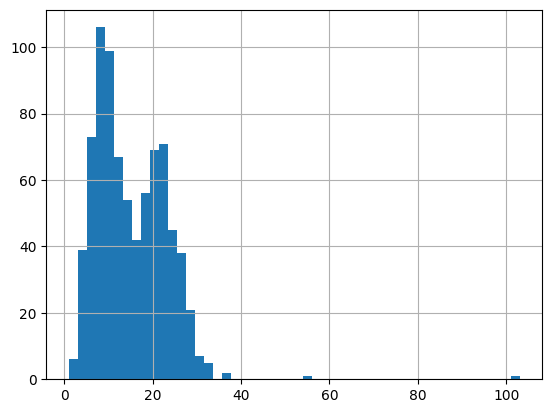

In [22]:
clubbed_df['revenue'].value_counts().hist(bins=50)

<Axes: >

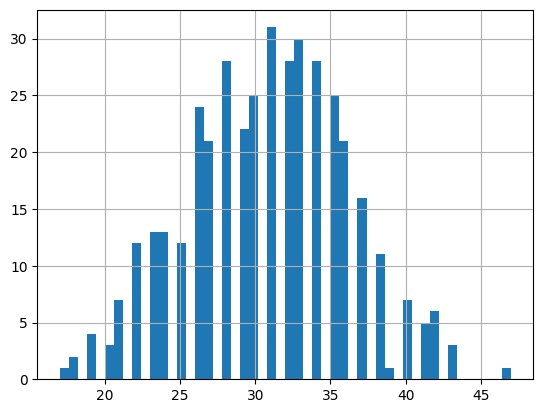

In [26]:
clubbed_df['sales'].value_counts().hist(bins=50)

In [63]:
#clubbed_df = clubbed_df.set_index("date")

In [35]:
import matplotlib.pyplot as plt

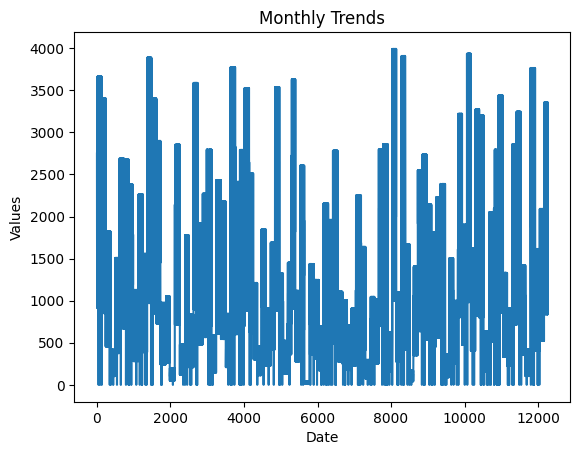

In [54]:
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Monthly Trends")
plt.plot(clubbed_df['revenue'])

In [47]:
clubbed_df.groupby('category').head(1)

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,2747.43
137,2,Beauty,851.54,184,2023-07-01,1,1,0,850.54,851.54
239,3,Books,454.96,177,2023-07-02,1,0,0,454.96,454.96
611,6,Clothing,672.15,41,2023-07-01,2,0,0,1344.30,1344.30
2254,19,Electronics,119.78,36,2023-07-02,4,0,0,479.12,479.12


In [52]:
clubbed_df.sort_values('sales').groupby('category').head(1)


,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
5716,47,Clothing,10.52,81,2023-10-08,1,0,0,10.52,10.52
8518,70,Home,42.72,118,2023-07-13,1,1,0,41.72,42.72
378,4,Beauty,104.46,150,2023-07-05,1,0,0,104.46,104.46
11714,96,Books,105.21,157,2023-09-27,1,0,0,105.21,105.21
2320,19,Electronics,119.78,36,2023-09-26,1,1,0,118.78,119.78


In [72]:
clubbed_df.sort_values('sales',ascending=False).groupby('category').head(1)


,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales,stock_balance
8043,66,Home,997.76,32,2023-07-23,4,0,0,3991.04,3991.04,28
10154,83,Beauty,983.59,27,2023-12-10,4,0,0,3934.36,3934.36,23
8341,68,Clothing,976.85,186,2023-10-12,4,1,0,3906.40,3907.40,182
1480,12,Books,971.99,59,2023-12-31,4,0,0,3887.96,3887.96,55
12244,100,Electronics,839.33,98,2023-11-13,4,0,0,3357.32,3357.32,94


In [53]:
clubbed_df.sort_values('revenue').groupby('category').head(1)

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
6307,52,Home,489.98,168,2023-07-29,1,1,1,-1.0,489.98
9831,81,Beauty,805.11,29,2023-07-27,1,1,1,-1.0,805.11
11337,93,Books,714.04,48,2023-08-30,1,1,1,-1.0,714.04
2394,19,Electronics,119.78,36,2023-12-27,1,1,1,-1.0,119.78
7472,61,Clothing,261.38,135,2023-09-20,1,1,1,-1.0,261.38


In [55]:
clubbed_df

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,2747.43
1,1,Home,915.81,10,2023-07-02,1,0,0,915.81,915.81
2,1,Home,915.81,10,2023-07-04,3,1,0,2746.43,2747.43
3,1,Home,915.81,10,2023-07-05,2,1,0,1830.62,1831.62
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81,1831.62
...,...,...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0,839.33,839.33
12262,100,Electronics,839.33,98,2023-12-21,4,0,0,3357.32,3357.32
12263,100,Electronics,839.33,98,2023-12-23,1,0,0,839.33,839.33
12264,100,Electronics,839.33,98,2023-12-24,1,0,0,839.33,839.33


category
Beauty         Axes(0.125,0.11;0.775x0.77)
Books          Axes(0.125,0.11;0.775x0.77)
Clothing       Axes(0.125,0.11;0.775x0.77)
Electronics    Axes(0.125,0.11;0.775x0.77)
Home           Axes(0.125,0.11;0.775x0.77)
dtype: object

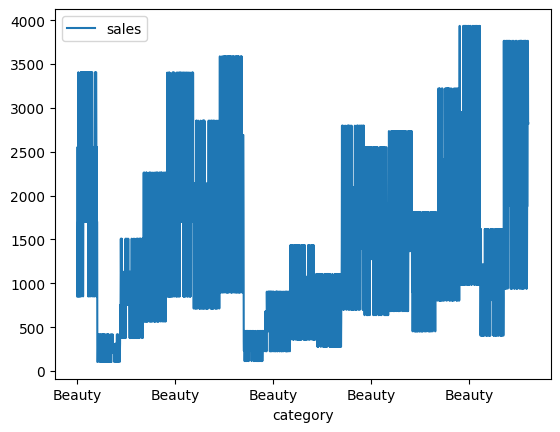

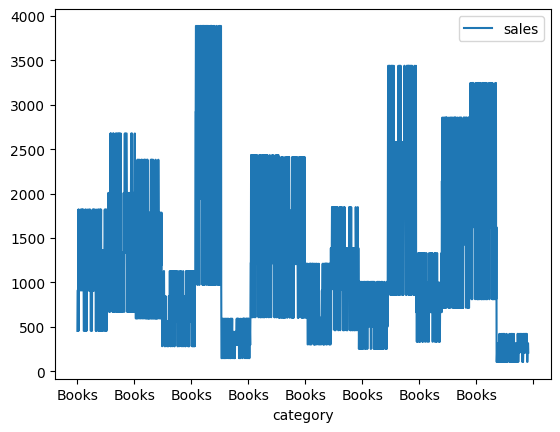

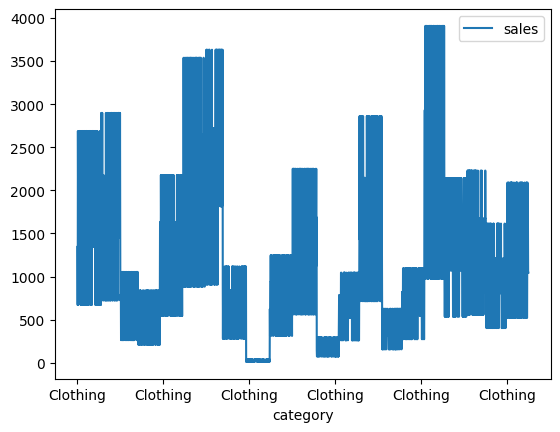

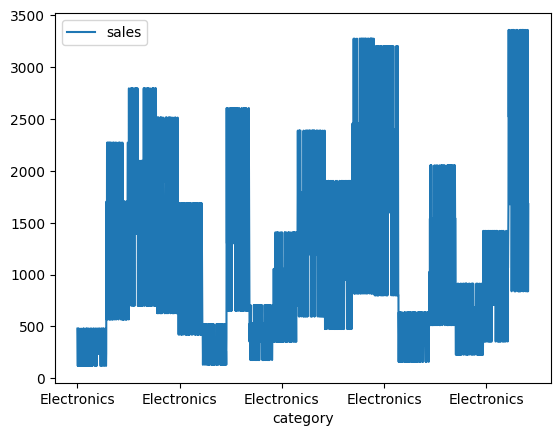

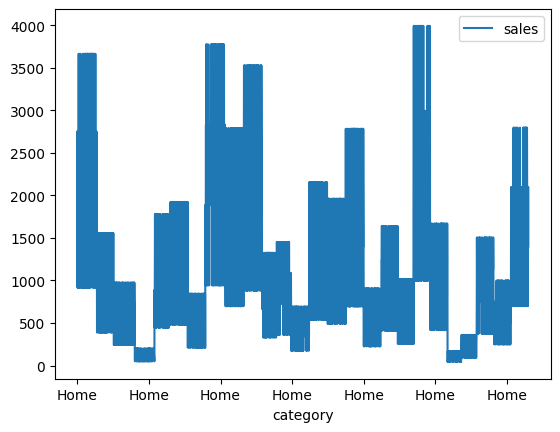

In [57]:
clubbed_df.groupby('category').plot(x='category',y='sales')

<Axes: xlabel='category'>

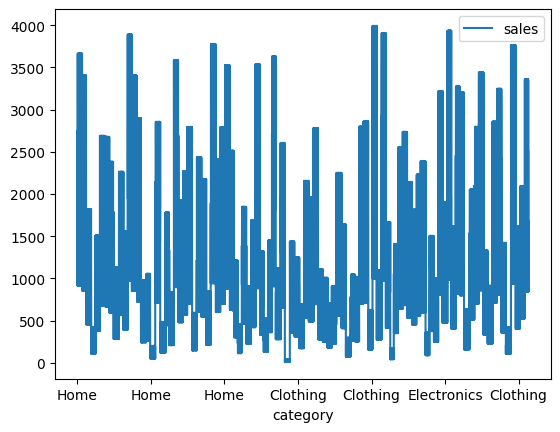

In [62]:
clubbed_df.plot(x='category',y='sales')

In [64]:
clubbed_df

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,2747.43
1,1,Home,915.81,10,2023-07-02,1,0,0,915.81,915.81
2,1,Home,915.81,10,2023-07-04,3,1,0,2746.43,2747.43
3,1,Home,915.81,10,2023-07-05,2,1,0,1830.62,1831.62
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81,1831.62
...,...,...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0,839.33,839.33
12262,100,Electronics,839.33,98,2023-12-21,4,0,0,3357.32,3357.32
12263,100,Electronics,839.33,98,2023-12-23,1,0,0,839.33,839.33
12264,100,Electronics,839.33,98,2023-12-24,1,0,0,839.33,839.33


In [65]:
clubbed_df.sort_values('stock_level').groupby('category').head(1)

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales
1639,14,Clothing,724.51,1,2023-08-11,3,0,0,2173.53,2173.53
11035,90,Books,859.78,3,2023-12-22,1,0,0,859.78,859.78
9451,77,Electronics,596.77,7,2023-12-03,1,1,0,595.77,596.77
15,1,Home,915.81,10,2023-07-24,1,0,0,915.81,915.81
10068,83,Beauty,983.59,27,2023-07-12,3,0,0,2950.77,2950.77


In [66]:
clubbed_df['stock_balance']=clubbed_df['stock_level']-clubbed_df['quantity']

In [67]:
clubbed_df

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales,stock_balance
0,1,Home,915.81,10,2023-07-02,3,0,0,2747.43,2747.43,7
1,1,Home,915.81,10,2023-07-02,1,0,0,915.81,915.81,9
2,1,Home,915.81,10,2023-07-04,3,1,0,2746.43,2747.43,7
3,1,Home,915.81,10,2023-07-05,2,1,0,1830.62,1831.62,8
4,1,Home,915.81,10,2023-07-09,2,0,1,915.81,1831.62,8
...,...,...,...,...,...,...,...,...,...,...,...
12261,100,Electronics,839.33,98,2023-12-20,1,0,0,839.33,839.33,97
12262,100,Electronics,839.33,98,2023-12-21,4,0,0,3357.32,3357.32,94
12263,100,Electronics,839.33,98,2023-12-23,1,0,0,839.33,839.33,97
12264,100,Electronics,839.33,98,2023-12-24,1,0,0,839.33,839.33,97


In [71]:
clubbed_df.sort_values('stock_balance',ascending=False).groupby('category').head(1)

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales,stock_balance
4295,35,Books,302.68,199,2023-09-13,1,1,0,301.68,302.68,198
10401,86,Electronics,800.36,196,2023-07-01,1,1,0,799.36,800.36,195
2185,18,Beauty,713.56,196,2023-10-01,1,0,0,713.56,713.56,195
6169,51,Home,538.75,188,2023-07-12,1,0,1,0.00,538.75,187
8350,68,Clothing,976.85,186,2023-10-25,1,0,1,0.00,976.85,185


In [70]:
clubbed_df.sort_values('stock_balance',ascending=False).head()

,product_id,category,price,stock_level,date,quantity,discount_applied,returned,revenue,sales,stock_balance
4295,35,Books,302.68,199,2023-09-13,1,1,0,301.68,302.68,198
4307,35,Books,302.68,199,2023-10-14,1,0,0,302.68,302.68,198
4358,35,Books,302.68,199,2023-12-23,1,0,0,302.68,302.68,198
4344,35,Books,302.68,199,2023-12-11,1,0,0,302.68,302.68,198
4293,35,Books,302.68,199,2023-09-10,1,0,0,302.68,302.68,198


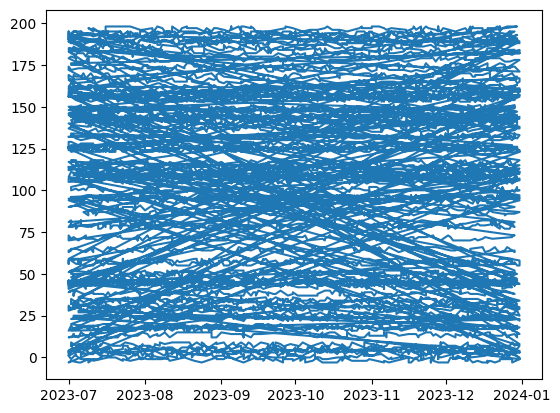

In [73]:
x=clubbed_df['date']
y=clubbed_df['stock_balance']
plt.plot(x,y)